# Price Comparison System using Python Libraries

# Installing required Libraries

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
!pip install autoscraper

# Importing required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from autoscraper import AutoScraper
import csv
import re

# Scrapping data from websites and storing in csv file.

In [2]:
def automate_scraper(zozohub_url, wanted_list):
    try:
        scraper = AutoScraper()
        scraper.load('zozohub-search')
    except FileNotFoundError:
        scraper = AutoScraper()

    new_results = scraper.get_result_similar(zozohub_url, grouped=True)

    if not scraper.get_result_similar(zozohub_url, grouped=True) == new_results:
        rule_names = [f'rule_{i}' for i in range(len(wanted_list))]
        rules = dict(zip(rule_names, wanted_list))
        scraper.build(zozohub_url, rules)

        rule_aliases = {rule_name: alias for rule_name, alias in zip(rule_names, wanted_list)}
        scraper.set_rule_aliases(rule_aliases)
        scraper.keep_rules(rule_names)

        scraper.save('zozohub-search')

    return scraper.get_result_similar(zozohub_url, grouped=True)

zozohub_url = "https://zozohub.com/laptops/laptops-by-brand/msi"
wanted_list = ["रु. 88,000", 'MSI Modern 14 B11M i5 10th Gen / Intel UHD / 8GB RAM / 512GB SSD / 14" FHD Display']

results = automate_scraper(zozohub_url, wanted_list)

price = results['rule_m7iu']
models = results['rule_nlb8']

data = list(zip(price, models))

with open('zozohub.csv', 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Price', 'Model'])
    csv_writer.writerows(data)

print("CSV file saved successfully.")

file_path = 'zozohub.csv'
data = pd.read_csv(file_path)
print(data)

CSV file saved successfully.
          Price                                              Model
0    रु. 88,000  MSI Modern 14 B11M i5 10th Gen / Intel UHD / 8...
1   रु. 112,000  MSI Modern 14 A11M i5 11th Gen / Iris Xe Graph...
2   रु. 112,000  MSI Modern 15 A11M i5 11th Gen / Iris Xe Graph...
3   रु. 130,000  MSI Summit B15 A11M i5 11th Gen / Iris Xe Grap...
4   रु. 132,000  MSI Modern 15 A11SB i5 11th Gen / MX450 / 8GB ...
5   रु. 136,000  MSI Modern 14 A10RB i7 10TH GEN/ 8GB RAM/ 512G...
6   रु. 145,000  MSI GF63 Thin 10SCXR i7 10TH GEN / GTX 1650 / ...
7   रु. 147,000  MSI Modern 15 A11SB i7 11th Gen / MX450 / 8GB ...
8   रु. 160,000  MSI GF65 Thin 10SDR Gaming Laptop / i7-10750H ...
9   रु. 180,000  MSI GF65 Thin 10UE Gaming Laptop / i7-10750H /...
10  रु. 192,000  MSI GL65 Leopard 10SDR Gaming Laptop / i7-1075...
11  रु. 243,500  MSI Prestige 15 A11SCX i7 11th Gen / GTX 1650 ...


In [3]:
def automate_scraper(itti_url, wanted_list2):
    try:
        scraper = AutoScraper()
        scraper.load('itti-search')
    except FileNotFoundError:
        scraper = AutoScraper()

    new_results2 = scraper.get_result_similar(itti_url, grouped=True)

    if not scraper.get_result_similar(itti_url, grouped=True) == new_results2:
        rule_names = [f'rule_{i}' for i in range(len(wanted_list2))]
        rules = dict(zip(rule_names, wanted_list2))
        scraper.build(itti_url, rules)

        rule_aliases = {rule_name: alias for rule_name, alias in zip(rule_names, wanted_list2)}
        scraper.set_rule_aliases(rule_aliases)
        scraper.keep_rules(rule_names)

        scraper.save('itti-search')

    return scraper.get_result_similar(itti_url, grouped=True)

itti_url = "https://itti.com.np/laptops-by-brands/msi-laptops-nepal"
wanted_list2 = ["NPR81,000.00",'MSI Modern 15 A4SX Ryzen 5 4500U / AMD Radeon Graphics / 8GB RAM / 512GB SSD / 15.6" FHD Display']

results2 = automate_scraper(itti_url, wanted_list2)

prices_itti = results2['rule_w6bh']
models_itti = results2['rule_p22l']

data_itti = list(zip(prices_itti, models_itti))

with open('itti.csv', 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Price', 'Model'])
    csv_writer.writerows(data_itti)

print("CSV file saved successfully.")

file_path = 'itti.csv'
data = pd.read_csv(file_path)
print(data)

CSV file saved successfully.
           Price                                              Model
0   NPR81,000.00  MSI Modern 15 A4SX Ryzen 5 4500U / AMD Radeon ...
1   NPR85,000.00  MSI Modern 15 A5M Ryzen 5 5500U / AMD Radeon G...
2   NPR95,000.00  MSI Modern 14 C12M 2022 i5 12TH GEN / 512GB SS...
3   NPR99,000.00  MSI Modern 14 B4MW Ryzen 7 4700U / 8GB RAM / 2...
4   NPR99,000.00  MSI GF63 9SCSR i5 9TH GEN/ 8GB RAM/ 256GB SSD ...
5  NPR105,000.00  MSI GF63 Thin 10SC i5 10TH GEN / GTX 1650 / 8G...
6  NPR115,000.00  MSI Thin GF63 12HW i5 12th Gen / Intel Arc A37...
7  NPR115,000.00  MSI Modern 15 B13M 2023 i5 13TH GEN / 512GB SS...
8  NPR115,000.00  MSI Summit B15 A11M  i5 11th Gen / 8GB RAM / I...
9  NPR120,000.00  MSI Modern 15 A11SB i5 11th Gen / GeForce MX45...


# Cleaning data stored in csv file

In [4]:
cleaned_data = []

with open('itti.csv', 'r', encoding='utf-8') as file:
    csv_reader = csv.reader(file)
    next(csv_reader) 
    for row in csv_reader:
        price = row[0].strip('"')
        model_specs = row[1].strip('"')

        parts = [s.strip() for s in model_specs.split('/')]
        if len(parts) >= 2:
            model = parts[0]
            specs = '/'.join(parts[1:])
            cleaned_data.append((price, model, specs))
        else:
            cleaned_data.append((price, model_specs, ''))

with open('cleaned_itti.csv', 'w', newline='', encoding='utf-8') as file:
    csv_writer = csv.writer(file)
    csv_writer.writerow(['Price', 'Model', 'Specs'])
    for entry in cleaned_data:
        csv_writer.writerow(entry)

file_path = 'cleaned_itti.csv'
data = pd.read_csv(file_path)
print(data)

           Price                                Model  \
0   NPR81,000.00     MSI Modern 15 A4SX Ryzen 5 4500U   
1   NPR85,000.00      MSI Modern 15 A5M Ryzen 5 5500U   
2   NPR95,000.00  MSI Modern 14 C12M 2022 i5 12TH GEN   
3   NPR99,000.00     MSI Modern 14 B4MW Ryzen 7 4700U   
4   NPR99,000.00            MSI GF63 9SCSR i5 9TH GEN   
5  NPR105,000.00       MSI GF63 Thin 10SC i5 10TH GEN   
6  NPR115,000.00       MSI Thin GF63 12HW i5 12th Gen   
7  NPR115,000.00  MSI Modern 15 B13M 2023 i5 13TH GEN   
8  NPR115,000.00     MSI Summit B15 A11M  i5 11th Gen   
9  NPR120,000.00      MSI Modern 15 A11SB i5 11th Gen   

                                               Specs  
0  AMD Radeon Graphics/8GB RAM/512GB SSD/15.6" FH...  
1  AMD Radeon Graphics/8GB RAM/256GB SSD/15.6" FH...  
2          512GB SSD/8GB RAM/14" FHD/2 Year Warranty  
3                  8GB RAM/256GB SSD/14" FHD Display  
4       8GB RAM/256GB SSD/GTX 1650TI/15.6" FHD 144Hz  
5  GTX 1650/8GB RAM/256GB SSD/15.6" FHD Di

In [5]:
cleaned_data = []

with open('zozohub.csv', 'r', encoding='utf-8') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    for row in csv_reader:
        price = row[0].strip('"').replace('रु. ', 'NPR')
        model_specs = row[1].strip('"')

        parts = [s.strip() for s in model_specs.split('/')]
        if len(parts) >= 2:
            model = parts[0]
            specs = '/'.join(parts[1:])
            cleaned_data.append((price, model, specs))
        else:
            cleaned_data.append((price, model_specs, ''))

with open('cleaned_zozohub.csv', 'w', newline='', encoding='utf-8') as file:
    csv_writer = csv.writer(file)
    csv_writer.writerow(['Price', 'Model', 'Specs'])
    for entry in cleaned_data:
        csv_writer.writerow(entry)

file_path = 'cleaned_zozohub.csv'
data = pd.read_csv(file_path)
print(data)


         Price                                 Model  \
0    NPR88,000        MSI Modern 14 B11M i5 10th Gen   
1   NPR112,000        MSI Modern 14 A11M i5 11th Gen   
2   NPR112,000        MSI Modern 15 A11M i5 11th Gen   
3   NPR130,000       MSI Summit B15 A11M i5 11th Gen   
4   NPR132,000       MSI Modern 15 A11SB i5 11th Gen   
5   NPR136,000       MSI Modern 14 A10RB i7 10TH GEN   
6   NPR145,000      MSI GF63 Thin 10SCXR i7 10TH GEN   
7   NPR147,000       MSI Modern 15 A11SB i7 11th Gen   
8   NPR160,000     MSI GF65 Thin 10SDR Gaming Laptop   
9   NPR180,000      MSI GF65 Thin 10UE Gaming Laptop   
10  NPR192,000  MSI GL65 Leopard 10SDR Gaming Laptop   
11  NPR243,500    MSI Prestige 15 A11SCX i7 11th Gen   

                                                Specs  
0         Intel UHD/8GB RAM/512GB SSD/14" FHD Display  
1   Iris Xe Graphics/8GB RAM/512GB SSD/14" FHD Dis...  
2   Iris Xe Graphics/8GB RAM/512GB SSD/15.6" FHD D...  
3   Iris Xe Graphics/8GB RAM/512GB SSD/15.6" FH

# Comparison

Enter a model to search for:  msi


Model found in Zozohub:
Price: NPR 88000.0
Model: MSI Modern 14 B11M i5 10th Gen
Specs: Intel UHD/8GB RAM/512GB SSD/14" FHD Display

Model found in Itti:
Price: NPR 81000.0
Model: MSI Modern 15 A4SX Ryzen 5 4500U
Specs: AMD Radeon Graphics/8GB RAM/512GB SSD/15.6" FHD Display

Price Difference: NPR 7000.0


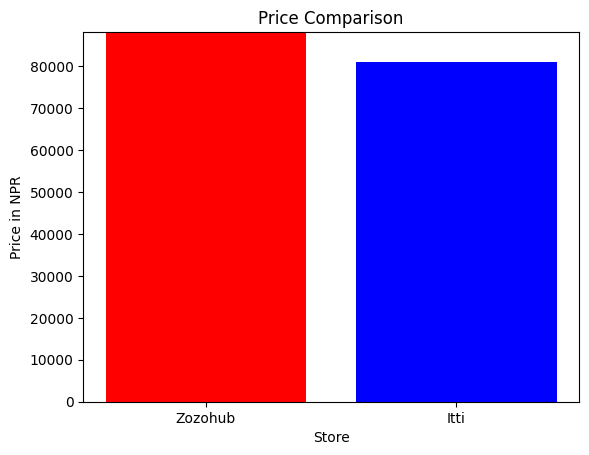

In [6]:
def preprocess_price(price_str):
    return float(re.sub(r'[^\d.]', '', price_str))

def search_model_in_csv(filename, model_to_search):
    with open(filename, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)
        for row in csv_reader:
            price = preprocess_price(row[0])
            model = row[1]
            specs = row[2]

            if model_to_search.lower() in model.lower():
                return price, model, specs
        return None, None, None

def main():
    model_to_search = input("Enter a model to search for: ")

    zozohub_price, zozohub_model, zozohub_specs = search_model_in_csv('cleaned_zozohub.csv', model_to_search)
    itti_price, itti_model, itti_specs = search_model_in_csv('cleaned_itti.csv', model_to_search)
    
    if zozohub_price and itti_price:
        print("Model found in Zozohub:")
        print("Price: NPR", zozohub_price)
        print("Model:", zozohub_model)
        print("Specs:", zozohub_specs)
        
        print("\nModel found in Itti:")
        print("Price: NPR", itti_price)
        print("Model:", itti_model)
        print("Specs:", itti_specs)
        
        price_difference = abs(zozohub_price - itti_price)
        print("\nPrice Difference: NPR", price_difference)
        
    elif zozohub_price:
        print("Model found in Zozohub:")
        print("Price: NPR", zozohub_price)
        print("Model:", zozohub_model)
        print("Specs:", zozohub_specs)
        
        print("Model not found in Itti.")
        
    elif itti_price:
        print("Model found in Itti:")
        print("Price: NPR", itti_price)
        print("Model:", itti_model)
        print("Specs:", itti_specs)
        
        print("Model not found in Zozohub.")
        
    else:
        print("Model not found in both stores.")
    
    max_price = max(zozohub_price, itti_price) if zozohub_price and itti_price else zozohub_price or itti_price
    max_price += 100
    
    if zozohub_price and itti_price:
        plt.bar(['Zozohub', 'Itti'], [zozohub_price, itti_price], color=['red', 'blue'])
    elif zozohub_price:
        plt.bar(['Zozohub'], [zozohub_price], color=['red'])
    elif itti_price:
        plt.bar(['Itti'], [itti_price], color=['blue'])
    else:
        plt.bar([], [])
    
    plt.xlabel('Store')
    plt.ylabel('Price in NPR')
    plt.title('Price Comparison')
    plt.ylim(0, max_price)
    plt.show()

if __name__ == "__main__":
    main()


# Thank You!